# Load Data

In [1]:
import pandas as pd
import numpy as np

# load labeled data
data = pd.read_csv('train_E6oV3lV.csv', encoding='iso-8859-1')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Processing

In [2]:
# Drop duplicates
data.drop_duplicates(inplace = True)

In [3]:
# Check for na values
data['tweet'].isna().sum()

0

In [4]:
data['id'].isna().sum()

0

In [5]:
data['label'].isna().sum()

0

In [6]:
# Clean tweets
import re

def clean_text(text):
    # only allow letters
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    # get rid of unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # lowercase
    text = text.lower()  
    return text

data['clean_text'] = data.tweet.apply(clean_text)

In [7]:
data.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [8]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords
data['clean_text'] = data['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))
data.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit can't use cause o...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [9]:
# Lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemma = WordNetLemmatizer()
data['clean_text'] = data['clean_text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Stemming
from nltk.stem import PorterStemmer
nltk.download('punkt')
ps = PorterStemmer()
data['clean_text'] = data['clean_text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nacho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Visualization of Hate/Nonhate words

In [11]:
# Count nonhate words
from collections import Counter
nonhate = ' '.join([word for word in data['clean_text'][data['label'] == 0]])
nonhate_words = nonhate.split()
c = Counter(nonhate_words)
common_nonhate = dict(c.most_common())
nh_key = list(common_nonhate.keys())
nh_val = list(common_nonhate.values())


In [12]:
# Count hate words
hate = ' '.join([word for word in data['clean_text'][data['label'] == 1]])
hate_words = hate.split()
h = Counter(hate_words)
common_hate = dict(h.most_common())
h_key = list(common_hate.keys())
h_val = list(common_hate.values())

In [13]:
# Top 15 counts of nonhate and hate words
count_df = pd.DataFrame(data = nh_key[0:15], columns=['Nonhate_words'])
count_df['Nonhate_counts'] = nh_val[0:15]
count_df['Hate_words'] = h_key[0:15]
count_df['Hate_counts'] = h_val[0:15]
count_df.head()

,Nonhate_words,Nonhate_counts,Hate_words,Hate_counts
0,user,15719,user,1864
1,love,3206,amp,300
2,day,2893,trump,207
3,happi,2084,white,156
4,u,1629,libtard,150


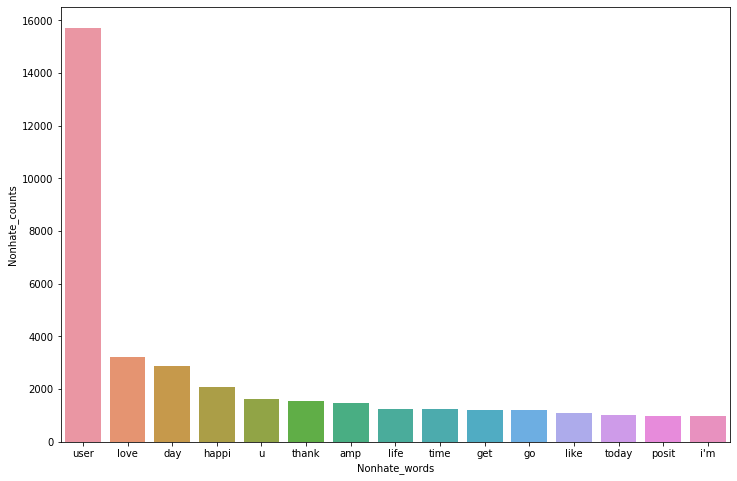

In [14]:
# Bar plot of nonhate words
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,8))
sns.barplot(count_df['Nonhate_words'],count_df['Nonhate_counts']);

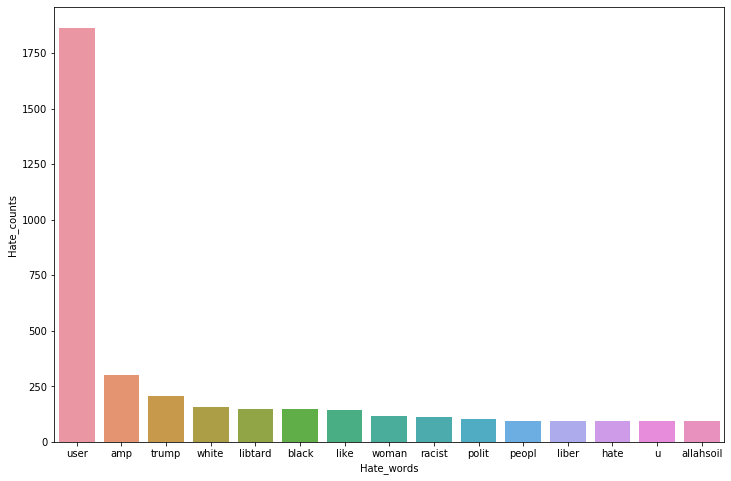

In [15]:
# Bar plot of hate words
plt.figure(figsize= (12,8))
sns.barplot(count_df['Hate_words'],count_df['Hate_counts']);

In [18]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


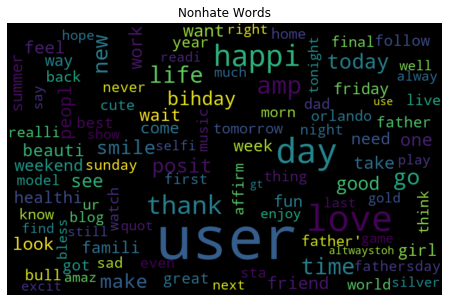

In [19]:
# Visualization of nonhate words
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100, collocations=False).generate(nonhate)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')
plt.title('Nonhate Words');

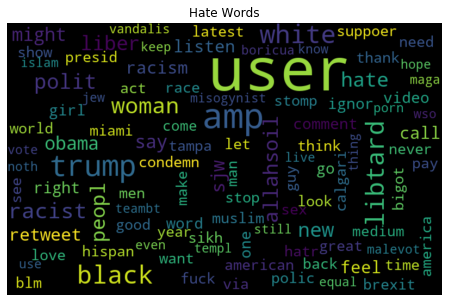

In [20]:
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100, collocations=False).generate(hate)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')
plt.title('Hate Words');

# Back to cleaning data - imbalance of hate/nonhate words

In [21]:
# Check number of hate and non-hate tweets
len(data[data['label']==0])

29720

In [22]:
len(data[data['label']==1])

2242

In [23]:
# Split & Balance the dataset
# First, split into train/test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data.label, test_size=0.20, random_state = 10)


In [24]:
X_train['label'] = y_train
X_train.head()

C:\Users\nacho\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,label,tweet,clean_text
29443,29444,0,on my blog: i choose happiness #blogging #tee...,blog choos happi blog teen
892,893,0,they have been brainwashed by the left who is ...,brainwash left allow terrorist come america kill
31056,31057,0,should check out the cityplace fb group. lots ...,check cityplac fb group lot repo potenti bike ...
28647,28648,0,great meeting this lunchtime at @user with @us...,great meet lunchtim user user user week golf d...
18579,18580,0,@user be in the peaceÃ°ÂÂÂÃ°ÂÂÂ»Ã°ÂÂÂº...,user peac spiritu quot inspir believ peac love...


In [25]:
# Downsample nonhate so that the proportion of hate:nonhate is 50:50
# More nonhate tweets than hate tweets
nonhate = X_train[X_train['label'] == 0]
nonhate.shape

(23790, 4)

In [26]:
hate = X_train[X_train['label'] == 1]
hate.shape

(1779, 4)

In [27]:
# Downsample nonhate words
nhsample = nonhate.sample(n = hate.shape[0])
nhsample.shape

(1779, 4)

In [28]:
train = pd.concat([hate, nhsample], axis = 0)
train.shape

(3558, 4)

In [29]:
train.head()

,id,label,tweet,clean_text
5240,5241,1,if reginald mcfadden had face to face intervie...,reginald mcfadden face face interview returnin...
3936,3937,1,the latest science u can use daily! thanks to...,latest scienc u use daili thank user
3141,3142,1,@user dealing with relatives reminding you tha...,user deal rel remind clock tick might help chi...
23649,23650,1,@user @user #israelis invented #apaheid #goyi...,user user isra invent apaheid goy word user user
22067,22068,1,racism in america: 'kill obama' and 'muslims n...,racism america 'kill obama' 'muslim welcom her...


In [30]:
train.to_csv("balanced_cleaned_train.csv")

In [31]:
X_test.to_csv("cleaned_Xtest.csv")
y_test.to_csv("cleaned_ytest.csv")